In [23]:
import torch
import torch.nn as nn
from quartz import IF
import matplotlib.pyplot as plt

In [79]:
t_max = 32

class Net(nn.Module):
    def __init__(self, t_max):
        super().__init__()
        self.t_max = t_max

        self.weight1 = nn.Linear(1,1, bias=False)
        self.layer1 = IF(t_max=t_max, record_v_mem=True)
        self.weight1.weight.data *= 0
        self.weight1.weight.data += 0.5

    def forward(self, data: torch.Tensor):
        data = self.weight1(data)
        counter_weight = torch.zeros_like(data)
        counter_weight[0, self.t_max] = 1 - data.sum()
        return self.layer1(data+counter_weight)

    def __len__(self):
        return 1

net = Net(t_max=t_max)

In [80]:
input_data = torch.zeros(1, (len(net)+1)*t_max-len(net), 1)
input_data[:, 0] = 1.

In [81]:
output = net(input_data)

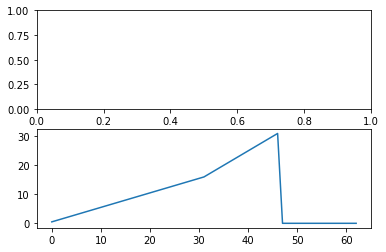

In [82]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 4))
# ax1.plot(net[0].v_mem_recorded.flatten().numpy())
ax2.plot(net.layer1.v_mem_recorded.flatten().detach().numpy())

In [83]:
output[0, -t_max:].nonzero()

tensor([[16,  0]])